Stage 1

In [40]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score

In [41]:
first_df = pd.read_csv("first.csv")
first_df

,Unnamed: 0,key,x,y,result
0,0,1,-0.515258,0.601255,False
1,1,1,0.442515,0.883295,True
2,2,1,-0.412906,0.154696,False
3,3,1,0.485963,-0.782856,False
4,4,1,0.223733,0.254806,True
...,...,...,...,...,...
995,995,1,-0.383606,-0.480100,True
996,996,1,0.381912,0.920676,True
997,997,1,0.795897,-0.085877,False
998,998,1,0.716176,0.240112,True


In [42]:
def extract_X_Y(df) :
    X = df [["x", "y"]].values
    Y = df ["result"].values
    return X, Y

In [43]:
X, Y = extract_X_Y(first_df)

In [44]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40)


In [45]:
def model_evaluation(y_test, y_pred) :
    print('Trained Model Test Data Accuracy Score :',accuracy_score(y_test, y_pred)*100)
    testacc=accuracy_score(y_test, y_pred)
    testrecall=recall_score(y_test, y_pred)
    testprecision=precision_score(y_test, y_pred)
    print(' ')
    print(classification_report(y_test, y_pred))
    return testacc, testrecall, testprecision

In [46]:
def create_eval_df(df, classifier) :
    eval_df = df.copy()
    eval_df["predict"] = classifier.predict(X)
    eval_df["correct"] = eval_df["predict"] == eval_df["result"]
    eval_df["correctandtrue"] = eval_df["predict"].isin([True]) & eval_df["result"].isin([True])
    return eval_df

In [47]:
#evaluate with Null Model
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
testacc, testrecall, testprecision = model_evaluation(y_test, y_pred)
dummy_eval_df = create_eval_df(first_df, dummy_clf)


Trained Model Test Data Accuracy Score : 50.5
 
              precision    recall  f1-score   support

       False       0.49      0.48      0.48       193
        True       0.52      0.53      0.53       207

    accuracy                           0.51       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.50      0.51      0.50       400



In [48]:
## Create Function to Print Results
def get_results(x1):
    print("\n{0:20}   {1:4}    {2:4}    {3:4}    {4:4}".format('Model','Train','Accuracy', 'Recall','Precision'))
    print('-------------------------------------------')
    for i in x1.keys():
        print("{0:20}   {1:<6.4}   {2:<6.4}    {3:<6.4}    {4:<6.4}".format(i,x1[i][0],x1[i][1],x1[i][2],x1[i][3]))

In [49]:
## Create dict to store all these results:
result_scores = {}
## Score the Model on Training and Testing Set
result_scores['Dummy'] = \
            (sklearn.metrics.accuracy_score(y_train,dummy_clf.predict(X_train)),
             testacc, testprecision, testrecall)

In [50]:
def show_results(_X, _YT, _YP, title) :
    #plot Training TEST data predictions
    f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex='none', figsize=(16,6))
    f.suptitle(title)

    ax1.scatter(_X[:, 0], _X[:, 1], c=_YT, facecolor='white', alpha=0.5)
    ax1.set_xlim(left=-1.0, right=1.0)
    ax1.set_ylim(bottom=-1.0, top=1.0)
    ax1.set_title("Test")

    ax2.scatter(_X[:, 0], _X[:, 1], c=_YP, facecolor='white', alpha=0.5)
    ax2.set_xlim(left=-1.0, right=1.0)
    ax2.set_ylim(bottom=-1.0, top=1.0)
    ax2.set_title("Prediction")

    ax3.scatter(_X[:, 0], _X[:, 1], c=_YP.astype(int) - _YT.astype(int), facecolor='white', alpha=0.5)
    ax3.set_xlim(left=-1.0, right=1.0)
    ax3.set_ylim(bottom=-1.0, top=1.0)
    ax3.set_title("Comparison")


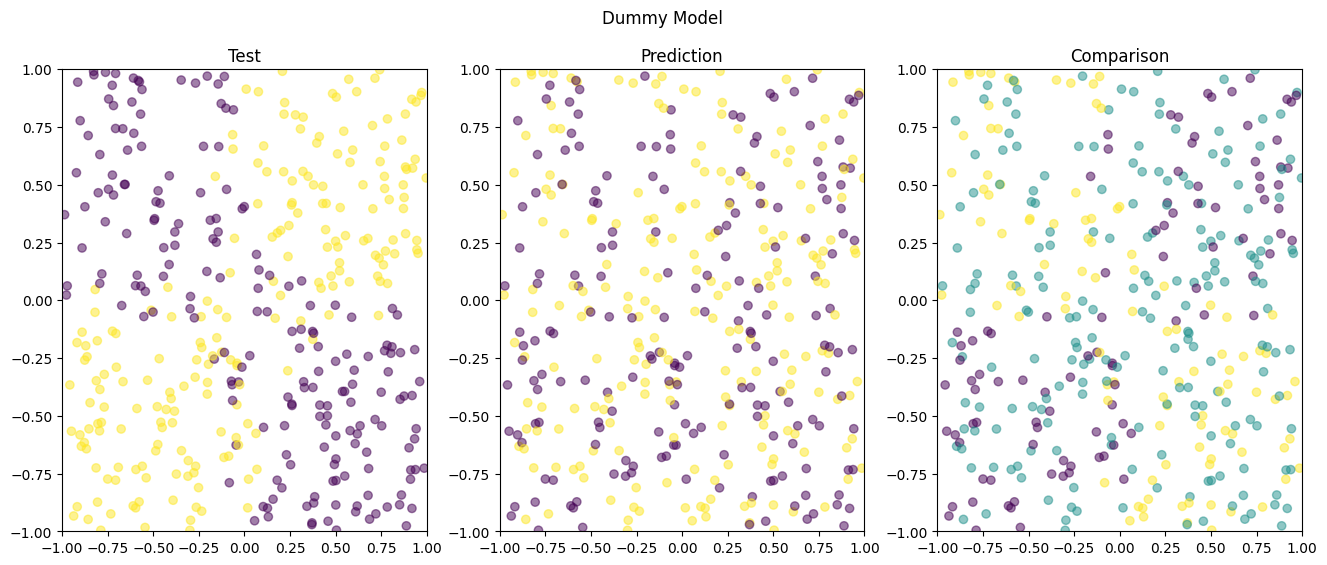

In [51]:
show_results(X_test, y_test, y_pred, 'Dummy Model')




Stage 2

In [52]:
#establish and fit KNN model
k=15
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, y_train)

#make test predictions
y_pred = classifier.predict(X_test)
testacc, testrecall, testprecision = model_evaluation(y_test, y_pred)

first_eval_df = create_eval_df(first_df, classifier)

## Score the Model on Training and Testing Set
result_scores['KNN-1'] = \
            (sklearn.metrics.accuracy_score(y_train,classifier.predict(X_train)),
             testacc, testprecision, testrecall)

Trained Model Test Data Accuracy Score : 90.25
 
              precision    recall  f1-score   support

       False       0.91      0.88      0.90       193
        True       0.89      0.92      0.91       207

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



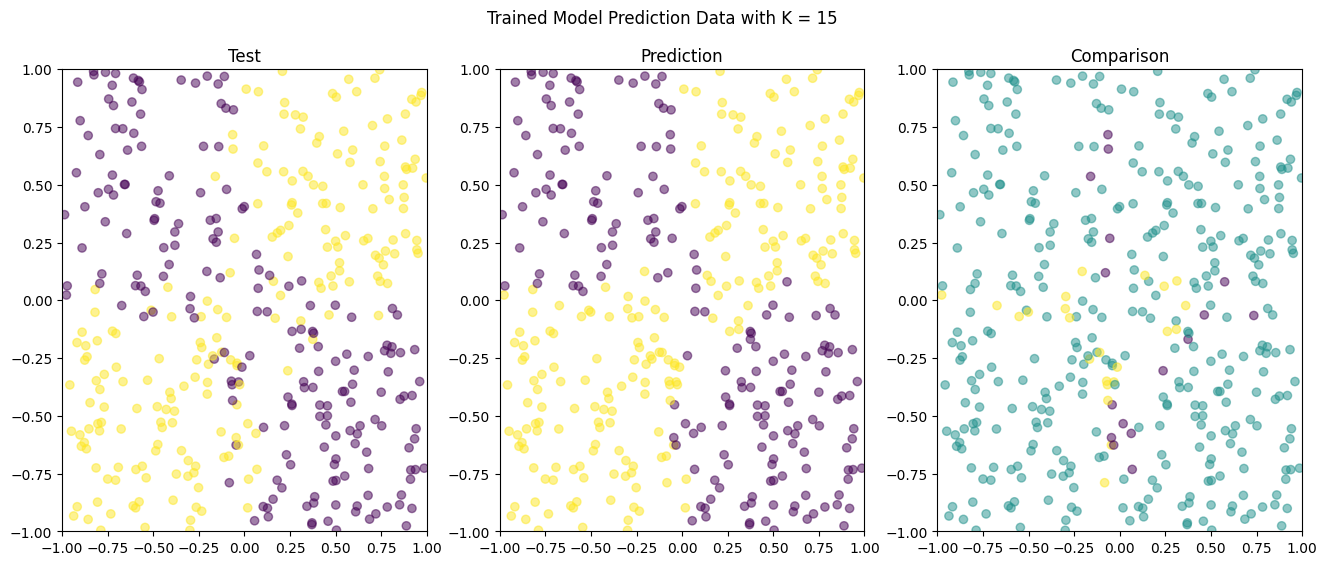

In [53]:
show_results(X_test, y_test, y_pred, 'Trained Model Prediction Data with K = {}'.format(k))


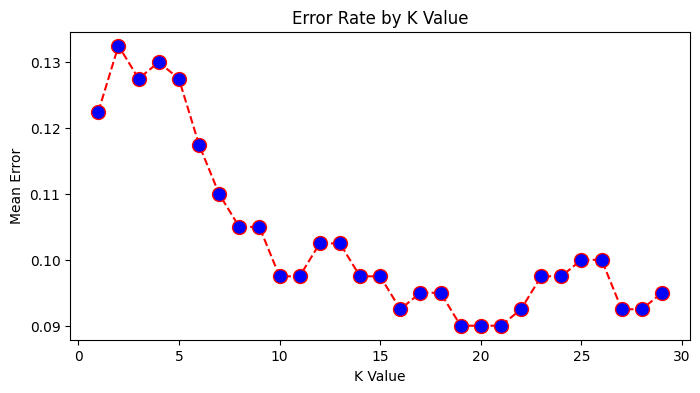

In [54]:
#plot to validate choice of k
error = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(8, 4))
ax=plt.axes()
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
ax.set_facecolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
plt.title('Error Rate by K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

Stage 3

In [55]:
second_df = pd.read_csv("second.csv")
X, Y = extract_X_Y(second_df)
y_pred = classifier.predict(X)
testacc, testrecall, testprecision = model_evaluation(Y, y_pred)

second_eval_df = create_eval_df(second_df, classifier)

## Score the Model on Training and Testing Set
result_scores['KNN-2'] = \
            (sklearn.metrics.accuracy_score(y_train,classifier.predict(X_train)),
             testacc, testprecision, testrecall)


Trained Model Test Data Accuracy Score : 90.8
 
              precision    recall  f1-score   support

       False       0.93      0.89      0.91       503
        True       0.89      0.93      0.91       497

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



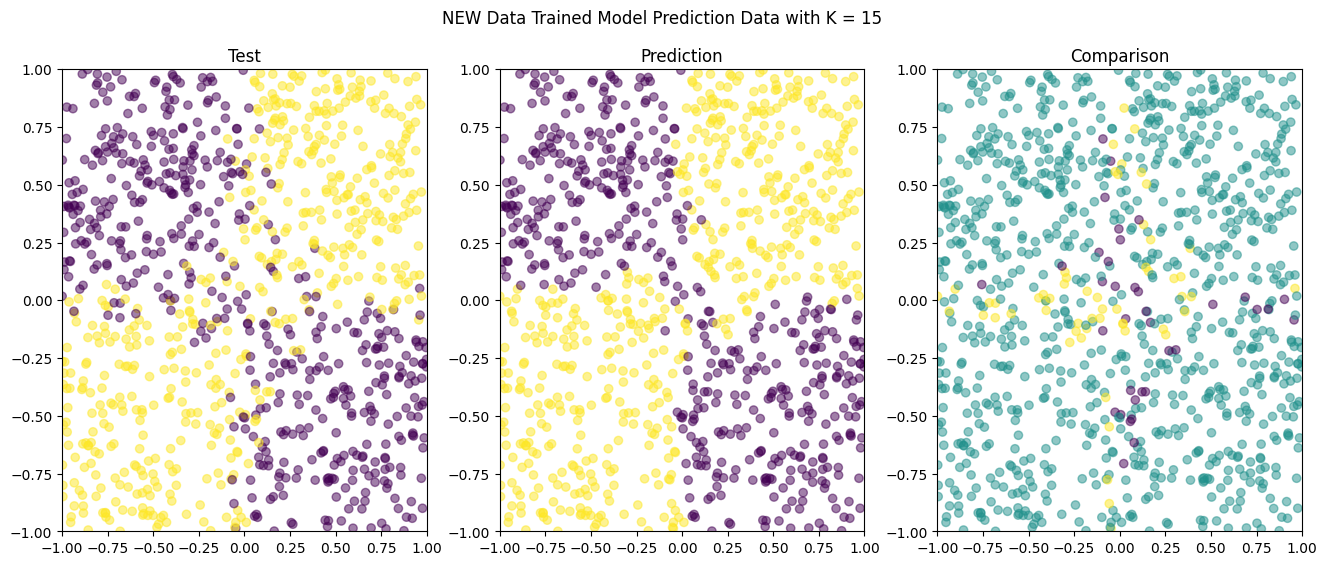

In [56]:
show_results(X, Y, y_pred, 'NEW Data Trained Model Prediction Data with K = {}'.format(k))

Stage 4

In [57]:
third_df = pd.read_csv("third.csv")
X, Y = extract_X_Y(third_df)
y_pred = classifier.predict(X)
testacc, testrecall, testprecision = model_evaluation(Y, y_pred)
third_eval_df = create_eval_df(third_df, classifier)
## Score the Model on Training and Testing Set
result_scores['KNN-3-1'] = \
            (sklearn.metrics.accuracy_score(y_train,classifier.predict(X_train)),
             testacc, testprecision, testrecall)

Trained Model Test Data Accuracy Score : 71.7
 
              precision    recall  f1-score   support

       False       1.00      0.65      0.79       801
        True       0.41      1.00      0.58       199

    accuracy                           0.72      1000
   macro avg       0.71      0.82      0.68      1000
weighted avg       0.88      0.72      0.75      1000



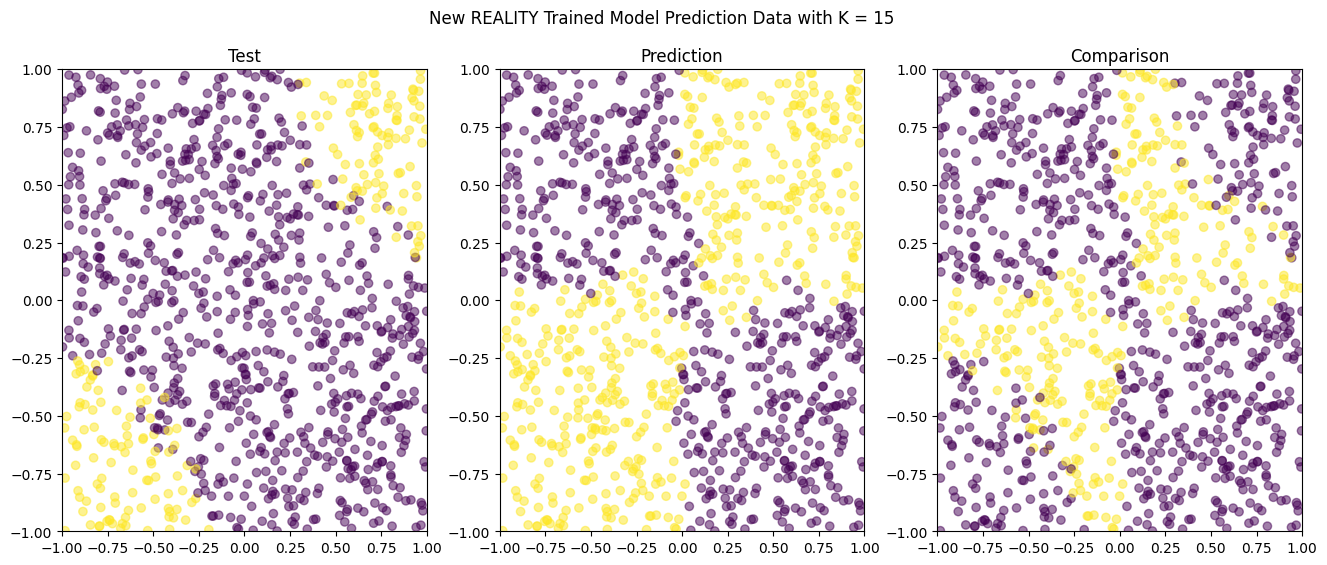

In [58]:
show_results(X, Y, y_pred, 'New REALITY Trained Model Prediction Data with K = {}'.format(k))

In [59]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40)

new_classifier = KNeighborsClassifier(n_neighbors=k)
new_classifier.fit(X_train, y_train)

#make test predictions
y_pred = new_classifier.predict(X_test)
testacc, testrecall, testprecision = model_evaluation(y_test, y_pred)

## Score the Model on Training and Testing Set
result_scores['KNN-3-2'] = \
            (sklearn.metrics.accuracy_score(y_train,new_classifier.predict(X_train)),
             testacc, testprecision, testrecall)

Trained Model Test Data Accuracy Score : 95.75
 
              precision    recall  f1-score   support

       False       0.96      0.99      0.97       320
        True       0.96      0.82      0.89        80

    accuracy                           0.96       400
   macro avg       0.96      0.91      0.93       400
weighted avg       0.96      0.96      0.96       400



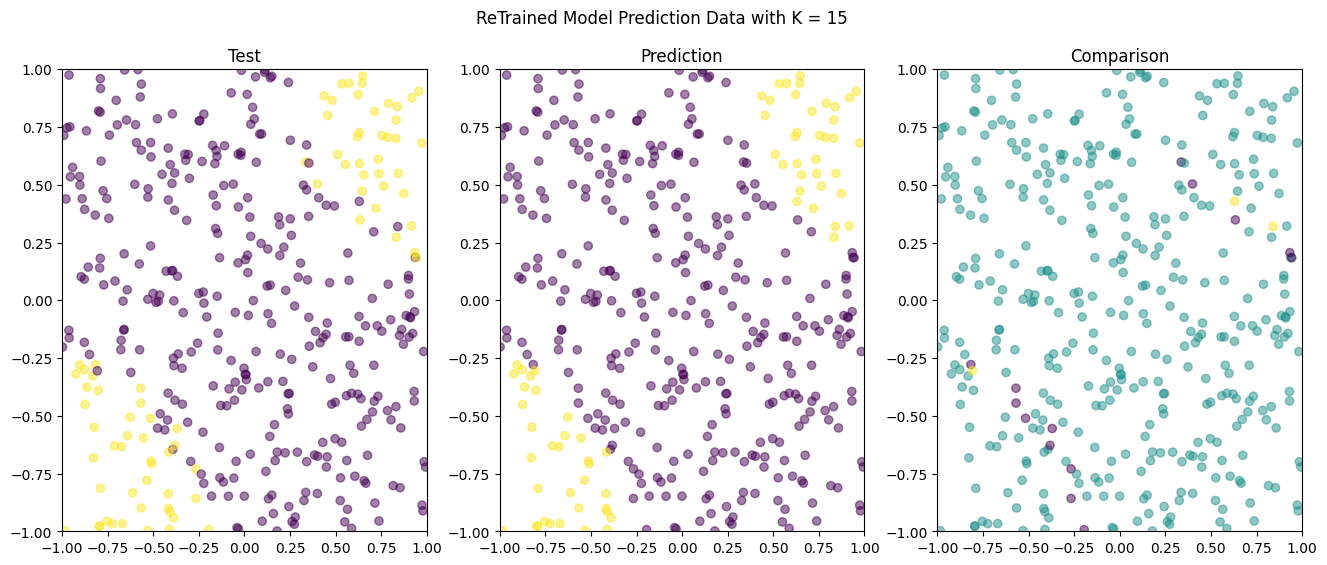

In [60]:
show_results(X_test, y_test, y_pred, 'ReTrained Model Prediction Data with K = {}'.format(k))

Stage 5

In [61]:
fourth_df = pd.read_csv("fourth.csv")
X, Y = extract_X_Y(fourth_df)
y_pred = new_classifier.predict(X)
testacc, testrecall, testprecision = model_evaluation(Y, y_pred)
fourth_eval_df = create_eval_df(fourth_df, classifier)
## Score the Model on Training and Testing Set
result_scores['KNN-3-3'] = \
            (sklearn.metrics.accuracy_score(y_train,new_classifier.predict(X_train)),
             testacc, testprecision, testrecall)

Trained Model Test Data Accuracy Score : 95.8
 
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       755
        True       0.94      0.88      0.91       245

    accuracy                           0.96      1000
   macro avg       0.95      0.93      0.94      1000
weighted avg       0.96      0.96      0.96      1000



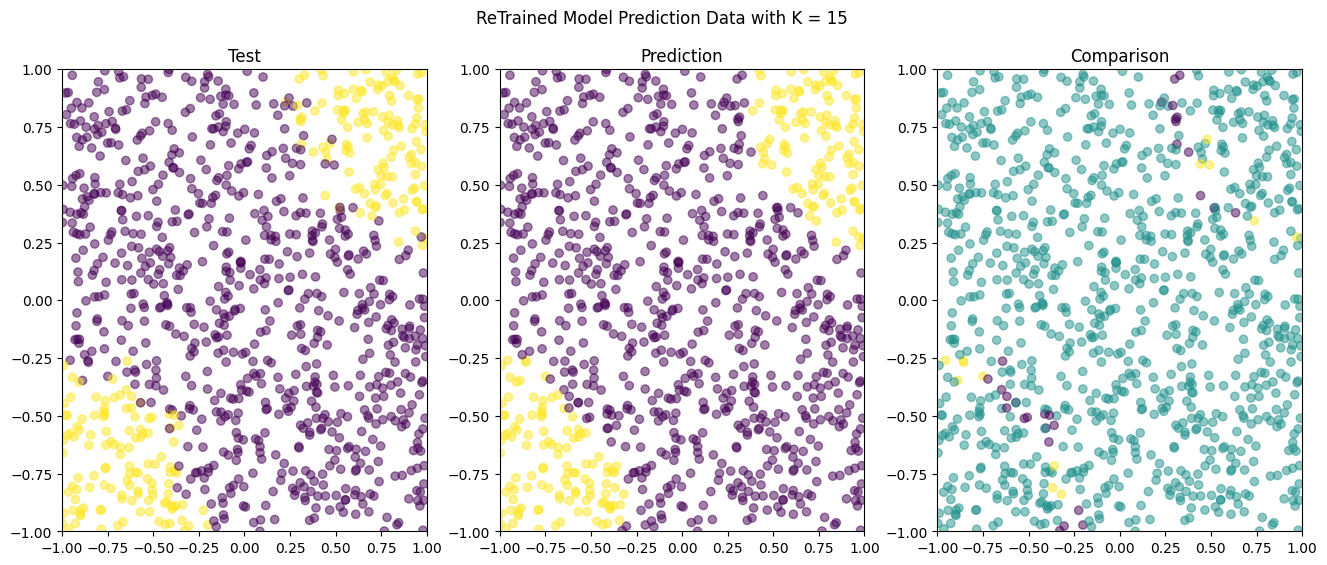

In [62]:
show_results(X, Y, y_pred, 'ReTrained Model Prediction Data with K = {}'.format(k))


In [63]:
#create model performance data
def createModelPerformanceData(df_array) :
    x=[]
    y=[]
    z=[]
    q=[]
    t=[]
    count=0
    correct=0
    countpredtrue=0.001
    correctandpredtrue=0
    true=.001
    for df in df_array :
        for index, row in dummy_eval_df.iterrows():
            count=count+1
            x.append(count)
            correct=correct + row['correct']
            y.append(correct)
            countpredtrue=countpredtrue + row['predict']
            q.append(countpredtrue)
            correctandpredtrue=correctandpredtrue + row['correctandtrue']
            z.append(correctandpredtrue)
            true=true + row['result']
            t.append(true)
    return x, y, q, z, t, count, countpredtrue, true

In [64]:
def graph_model_performance(x, y, q, z, t, count, countpredtrue, true):
    f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex='none', figsize=(16,6))
    f.suptitle('Model Performance')
    ax1.set_title('Accuracy (are predictions correct?)')
    ax1.scatter(x,y)
    ax1.plot([0, count], [0, count*testacc],'k-', color = 'r')

    ax2.set_title('Recall (find all actual positives?)')
    ax2.scatter(t,z)
    ax2.plot([0, true], [0, true*testrecall],'k-', color = 'r')

    ax3.set_title('Precision (are positive predictions correct?)')
    ax3.scatter(q,z)
    ax3.plot([0, countpredtrue], [0, countpredtrue*testprecision],'k-', color = 'r')

<ipython-input-64-ed88e3bd424a>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax1.plot([0, count], [0, count*testacc],'k-', color = 'r')
<ipython-input-64-ed88e3bd424a>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax2.plot([0, true], [0, true*testrecall],'k-', color = 'r')
<ipython-input-64-ed88e3bd424a>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax3.plot([0, countpredtrue], [0, countpredtrue*testprecision],'k-', color = 'r')


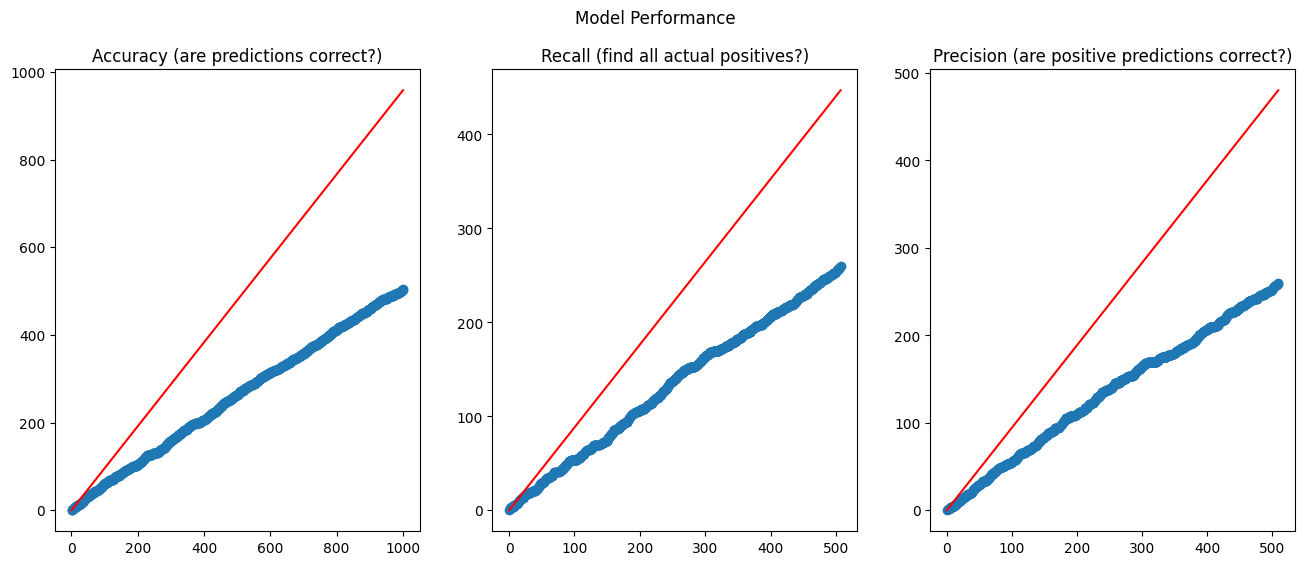

In [65]:
x, y, q, z, t, count, countpredtrue, true   = createModelPerformanceData([dummy_eval_df])
graph_model_performance(x, y, q, z, t, count, countpredtrue, true   )

<ipython-input-64-ed88e3bd424a>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax1.plot([0, count], [0, count*testacc],'k-', color = 'r')
<ipython-input-64-ed88e3bd424a>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax2.plot([0, true], [0, true*testrecall],'k-', color = 'r')
<ipython-input-64-ed88e3bd424a>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax3.plot([0, countpredtrue], [0, countpredtrue*testprecision],'k-', color = 'r')


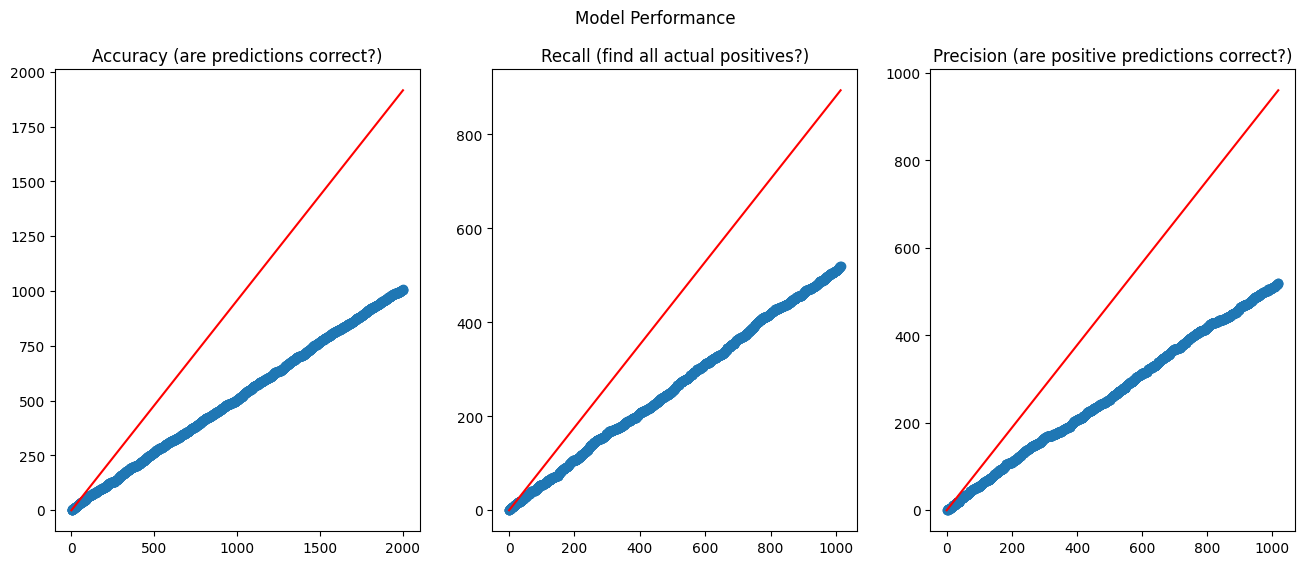

In [66]:
x, y, q, z, t, count, countpredtrue, true   = createModelPerformanceData([first_eval_df, second_eval_df])#, third_eval_df, fourth_eval_df])
graph_model_performance(x, y, q, z, t, count, countpredtrue, true   )

In [67]:
get_results(result_scores)


Model                  Train    Accuracy    Recall    Precision
-------------------------------------------
Dummy                  0.52     0.505     0.5213    0.5314
KNN-1                  0.9117   0.9025    0.8925    0.9227
KNN-2                  0.9117   0.908     0.8917    0.9276
KNN-3-1                0.9117   0.717     0.4129    1.0   
KNN-3-2                0.975    0.9575    0.9565    0.825 
KNN-3-3                0.975    0.958     0.9432    0.8816


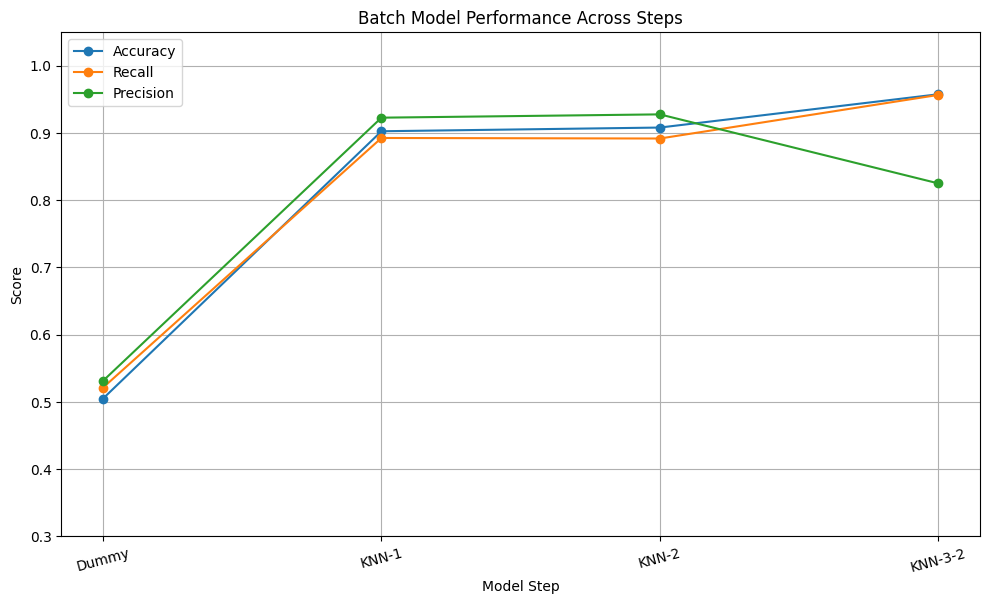

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

def get_results(result_scores):
    # Convert the list of dicts to a DataFrame
    df = pd.DataFrame(result_scores)

    # Drop KNN-3-1 if present
    df = df[df['Model'] != 'KNN-3-1']

    # Plot the graph
    plt.figure(figsize=(10, 6))
    plt.plot(df['Model'], df['Accuracy'], marker='o', label='Accuracy')
    plt.plot(df['Model'], df['Recall'], marker='o', label='Recall')
    plt.plot(df['Model'], df['Precision'], marker='o', label='Precision')

    plt.title("Batch Model Performance Across Steps")
    plt.xlabel("Model Step")
    plt.ylabel("Score")
    plt.ylim(0.3, 1.05)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.xticks(rotation=15)
    plt.show()

# Data (excluding KNN-3-1)
result_scores = [
    {"Model": "Dummy", "Train": 0.52, "Accuracy": 0.505, "Recall": 0.5213, "Precision": 0.5314},
    {"Model": "KNN-1", "Train": 0.9117, "Accuracy": 0.9025, "Recall": 0.8925, "Precision": 0.9227},
    {"Model": "KNN-2", "Train": 0.9117, "Accuracy": 0.908, "Recall": 0.8917, "Precision": 0.9276},
    {"Model": "KNN-3-2", "Train": 0.975, "Accuracy": 0.9575, "Recall": 0.9565, "Precision": 0.825},
    {"Model": "KNN-3-3", "Train": None, "Accuracy": None, "Recall": None, "Precision": None}  # placeholder if needed
]

get_results(result_scores)
